In [2]:
"""This notebook is to train XGBoost on wheat seeds prediction dataset"""

'This notebook is to train XGBoost on wheat seeds prediction dataset'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [4]:
data = pd.read_csv('../datasets/Seed_Data.csv')
print("Data shape:", data.shape)
data.head()

Data shape: (210, 8)


,Area,Perimeter,Compactness,length_of_kernel,width_of_kernel,asymetric_coef,length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [5]:
print("Column names:", data.columns.tolist())
print("Original data shape:", data.shape)

Column names: ['Area', 'Perimeter', 'Compactness', 'length_of_kernel', 'width_of_kernel', 'asymetric_coef', 'length_of_kernel_groove', 'target']
Original data shape: (210, 8)


In [6]:
data = data.dropna()
print("Data shape after removing NaN:", data.shape)


Data shape after removing NaN: (210, 8)


In [7]:
print("Missing values per column:", data.isnull().sum())

Missing values per column: Area                       0
Perimeter                  0
Compactness                0
length_of_kernel           0
width_of_kernel            0
asymetric_coef             0
length_of_kernel_groove    0
target                     0
dtype: int64


In [8]:
X = data.drop(columns=["target"])
y = data["target"]

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)
print("Target classes:", sorted(y.unique()))

Feature matrix shape: (210, 7)
Target shape: (210,)
Target classes: [np.int64(0), np.int64(1), np.int64(2)]


In [9]:
print("\nFeature data types:")
print(X.dtypes)
print("\nTarget data type:", y.dtype)



Feature data types:
Area                       float64
Perimeter                  float64
Compactness                float64
length_of_kernel           float64
width_of_kernel            float64
asymetric_coef             float64
length_of_kernel_groove    float64
dtype: object

Target data type: int64


In [10]:
print("\nFeature statistics:")
print(X.describe())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Feature statistics:
             Area   Perimeter  Compactness  length_of_kernel  width_of_kernel  \
count  210.000000  210.000000   210.000000        210.000000       210.000000   
mean    14.847524   14.559286     0.870999          5.628533         3.258605   
std      2.909699    1.305959     0.023629          0.443063         0.377714   
min     10.590000   12.410000     0.808100          4.899000         2.630000   
25%     12.270000   13.450000     0.856900          5.262250         2.944000   
50%     14.355000   14.320000     0.873450          5.523500         3.237000   
75%     17.305000   15.715000     0.887775          5.979750         3.561750   
max     21.180000   17.250000     0.918300          6.675000         4.033000   

       asymetric_coef  length_of_kernel_groove  
count      210.000000               210.000000  
mean         3.700201                 5.408071  
std          1.503557                 0.491480  
min          0.765100                 4.519000  
25% 

In [11]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:", y_train.value_counts().sort_index())
print("Test target distribution:", y_test.value_counts().sort_index())

Training set shape: (168, 7)
Test set shape: (42, 7)
Training target distribution: target
0    56
1    56
2    56
Name: count, dtype: int64
Test target distribution: target
0    14
1    14
2    14
Name: count, dtype: int64


In [26]:
print("Training XGBoost model...")
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    learning_rate=0.1,
    n_estimators=10000,        # Big upper bound (acts as max)
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    early_stopping_rounds=50,
    verbosity=1
)

Training XGBoost model...


In [27]:
xgb_model.fit(X_train, y_train,
eval_set = [(X_train, y_train), (X_test, y_test)],
verbose=True
)
print("✅ XGBoost model training completed!")

[0]	validation_0-mlogloss:0.98007	validation_1-mlogloss:0.99163
[1]	validation_0-mlogloss:0.87443	validation_1-mlogloss:0.90796
[2]	validation_0-mlogloss:0.78432	validation_1-mlogloss:0.82568
[3]	validation_0-mlogloss:0.70574	validation_1-mlogloss:0.75518
[4]	validation_0-mlogloss:0.63985	validation_1-mlogloss:0.69240
[5]	validation_0-mlogloss:0.58275	validation_1-mlogloss:0.64319
[6]	validation_0-mlogloss:0.53193	validation_1-mlogloss:0.60242
[7]	validation_0-mlogloss:0.48444	validation_1-mlogloss:0.56956


[8]	validation_0-mlogloss:0.44328	validation_1-mlogloss:0.52962
[9]	validation_0-mlogloss:0.40629	validation_1-mlogloss:0.49649
[10]	validation_0-mlogloss:0.37286	validation_1-mlogloss:0.47093
[11]	validation_0-mlogloss:0.34228	validation_1-mlogloss:0.44650
[12]	validation_0-mlogloss:0.31632	validation_1-mlogloss:0.42427
[13]	validation_0-mlogloss:0.29093	validation_1-mlogloss:0.40637
[14]	validation_0-mlogloss:0.26872	validation_1-mlogloss:0.39028
[15]	validation_0-mlogloss:0.24909	validation_1-mlogloss:0.37056
[16]	validation_0-mlogloss:0.23020	validation_1-mlogloss:0.35682
[17]	validation_0-mlogloss:0.21354	validation_1-mlogloss:0.34828
[18]	validation_0-mlogloss:0.19901	validation_1-mlogloss:0.33541
[19]	validation_0-mlogloss:0.18565	validation_1-mlogloss:0.32587
[20]	validation_0-mlogloss:0.17297	validation_1-mlogloss:0.31963
[21]	validation_0-mlogloss:0.16150	validation_1-mlogloss:0.31403
[22]	validation_0-mlogloss:0.15162	validation_1-mlogloss:0.30512
[23]	validation_0-mlogloss:

In [28]:
print("Making predictions...")
y_pred = xgb_model.predict(X_test)

Making predictions...


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8810

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.88      1.00      0.93        14
           2       0.82      1.00      0.90        14

    accuracy                           0.88        42
   macro avg       0.90      0.88      0.87        42
weighted avg       0.90      0.88      0.87        42



In [32]:
print("Generating feature importance plot...")
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

Generating feature importance plot...


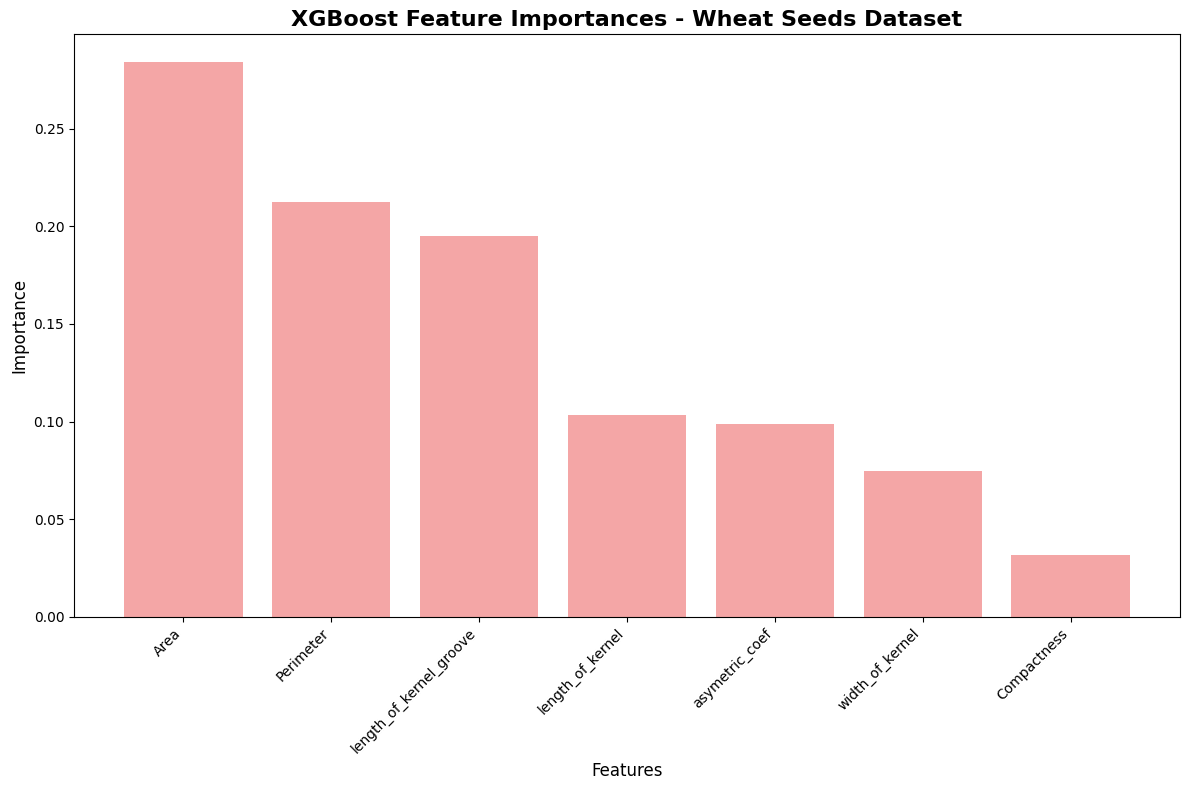

In [33]:
k = min(20, len(importances))

plt.figure(figsize=(12, 8))
plt.title("XGBoost Feature Importances - Wheat Seeds Dataset", fontsize=16, fontweight='bold')
plt.bar(range(k), importances[indices[:k]], align="center", alpha=0.7, color='lightcoral')
plt.xticks(range(k), X.columns[indices[:k]], rotation=45, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
print("\nFeature Importance Ranking:")
for i in range(len(importances)):
    feature_idx = indices[i]
    print(f"{i+1:2d}. {X.columns[feature_idx]:<20} {importances[feature_idx]:.4f}")



Feature Importance Ranking:
 1. Area                 0.2841
 2. Perimeter            0.2124
 3. length_of_kernel_groove 0.1948
 4. length_of_kernel     0.1036
 5. asymetric_coef       0.0988
 6. width_of_kernel      0.0749
 7. Compactness          0.0314


In [35]:
print("\nSample Predictions:")
sample = X_test.head()
sample_predictions = xgb_model.predict(sample)
sample_probabilities = xgb_model.predict_proba(sample)

print("Predictions:", sample_predictions.tolist())
print("Actual:", y_test.head().tolist())


Sample Predictions:
Predictions: [0, 2, 1, 2, 1]
Actual: [0, 2, 1, 2, 1]


In [36]:
print("\nPrediction Probabilities:")
class_labels = sorted(y.unique())
for i, (pred, prob) in enumerate(zip(sample_predictions, sample_probabilities)):
    print(f"Sample {i+1}: Predicted class {pred}")
    for j, class_label in enumerate(class_labels):
        print(f"  Class {class_label}: {prob[j]:.3f}")
    print()

# Save everything in a single file
model_package = {
    'model': xgb_model,
    'feature_columns': X.columns.tolist(),
    'target_classes': sorted(y.unique()),
    'model_type': 'XGBoost',
    'accuracy': accuracy,
    'dataset': 'Wheat Seeds',
    'feature_importances': dict(zip(X.columns, importances))
}


Prediction Probabilities:
Sample 1: Predicted class 0
  Class 0: 0.967
  Class 1: 0.019
  Class 2: 0.014

Sample 2: Predicted class 2
  Class 0: 0.026
  Class 1: 0.014
  Class 2: 0.961

Sample 3: Predicted class 1
  Class 0: 0.179
  Class 1: 0.801
  Class 2: 0.020

Sample 4: Predicted class 2
  Class 0: 0.013
  Class 1: 0.010
  Class 2: 0.977

Sample 5: Predicted class 1
  Class 0: 0.013
  Class 1: 0.977
  Class 2: 0.010



In [37]:
model_filename = "xgboost_wheat_seeds_complete.pkl"
joblib.dump(model_package, model_filename)
print(f"✅ Complete model package saved as {model_filename}")
print("Package contains: model, feature_columns, target_classes, model_type, accuracy, dataset, feature_importances")


✅ Complete model package saved as xgboost_wheat_seeds_complete.pkl
Package contains: model, feature_columns, target_classes, model_type, accuracy, dataset, feature_importances


In [38]:
print("\n" + "="*60)
print("XGBoost Wheat Seeds Classification - Training Summary")
print("="*60)
print(f"Final Accuracy: {accuracy:.4f}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(class_labels)}")
print(f"Classes: {class_labels}")
print(f"Model package saved: {model_filename}")
print("="*60)


XGBoost Wheat Seeds Classification - Training Summary
Final Accuracy: 0.8810
Training samples: 168
Test samples: 42
Number of features: 7
Number of classes: 3
Classes: [np.int64(0), np.int64(1), np.int64(2)]
Model package saved: xgboost_wheat_seeds_complete.pkl
